In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd
%matplotlib inline

x_train = pd.read_csv('data/train.csv')

Loading BokehJS ...

In [2]:
clean = Clean(x_train=x_train, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,575,712,712,NaN,712,NaN,NaN
mean,450.233,0.390449,2.29073,NaN,NaN,29.9733,0.518258,0.391854,NaN,33.0381,NaN,NaN
std,252.724,0.488194,0.839277,NaN,NaN,15.0375,1.08678,0.817936,NaN,52.2627,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,239.75,0,2,NaN,NaN,20,0,0,NaN,7.925,NaN,NaN
50%,449.5,0,3,NaN,NaN,28,0,0,NaN,14.4792,NaN,NaN
75%,670.25,1,3,NaN,NaN,39,1,0,NaN,31.275,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,575,712,712,712,712,165,711
uniques,712,2,3,712,2,82,7,7,564,223,127,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,575,712,712,712,712,165,711
uniques,712,2,3,712,2,82,7,7,564,223,127,3
missing,0,0,0,0,0,137,0,0,0,0,547,1
missing_perc,0%,0%,0%,0%,0%,19.24%,0%,0%,0%,0%,76.83%,0.14%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        33.0381
std                         52.2627
variance                    2731.39
min                               0
max                         512.329
mode                           7.75
5%                            7.225
25%                           7.925
50%                         14.4792
75%                          31.275
95%                         113.275
iqr                           23.35
kurtosis                    33.0625
skewness                     4.8434
sum                         23523.2
mad                         29.1478
cv                          1.58189
zeros_num                        14
zeros_perc                    1.97%
deviating_of_mean                18
deviating_of_mean_perc        2.53%
deviating_of_median              44
deviating_of_median_perc      6.18%
top_correlations                   
counts                          712
uniques                         223
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


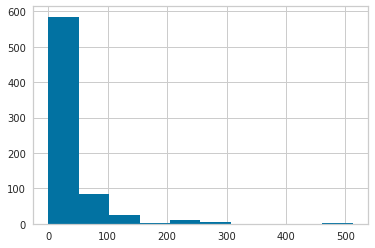

In [6]:
clean.describe_column('Fare')

33.038143117977526

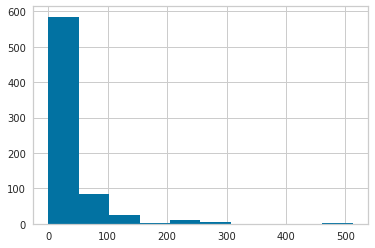

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.001404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.001404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,40.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.223464,0.005587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,NaN,6.75,Q
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,E33,55,S
2,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,NaN,33,S
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,NaN,7.5208,S
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,NaN,7.125,S


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


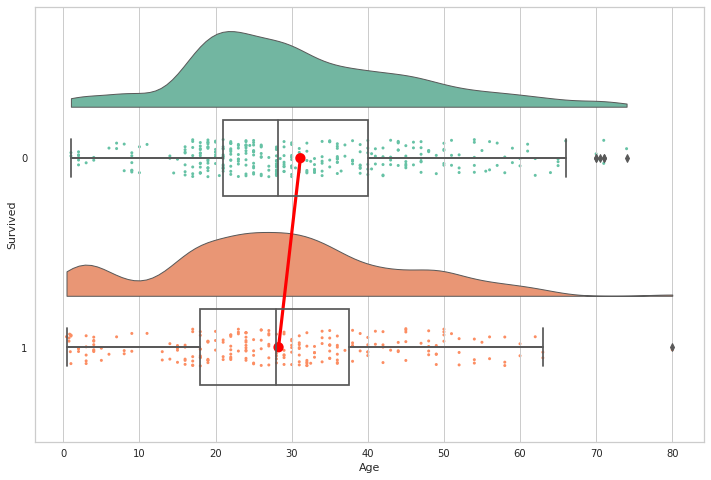

In [12]:
clean.raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,NaN,6.75,Q
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,E33,55,S
2,597,1,2,"Leitch, Miss. Jessie Wills",female,24.0,0,0,248727,NaN,33,S
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,NaN,7.5208,S
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,NaN,7.125,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.barplot(x='Age', y=['Survived'], method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.75,Q
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55,S
2,597,1,2,"Leitch, Miss. Jessie Wills",female,24.0,0,0,248727,33,S
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.125,S


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,82,7,7,564,223,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,Q,Miss
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S,Miss
2,597,1,2,"Leitch, Miss. Jessie Wills",female,24.0,0,0,248727,33.0000,S,Miss
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S,Mr
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,S,Mr


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.x_test['SibSp'] + feature.x_test['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,Q,Miss,0
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S,Miss,1
2,597,1,2,"Leitch, Miss. Jessie Wills",female,24.0,0,0,248727,33.0000,S,Miss,0
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S,Mr,0
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,S,Mr,0


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,Q,Miss,0,female
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S,Miss,1,female
2,597,1,2,"Leitch, Miss. Jessie Wills",female,24.0,0,0,248727,33.0000,S,Miss,0,female
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S,Mr,0,male
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,S,Mr,0,male


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,Q,Miss,0,female
1,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S,Miss,1,female
2,597,1,2,"Leitch, Miss. Jessie Wills",female,24.0,0,0,248727,33.0000,S,Miss,0,female
3,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S,Mr,0,male
4,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,S,Mr,0,male


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,0,3,18.0,6.7500,Q,Miss,0,female
1,1,1,22.0,55.0000,S,Miss,1,female
2,1,2,24.0,33.0000,S,Miss,0,female
3,0,3,22.0,7.5208,S,Mr,0,male
4,0,3,17.0,7.1250,S,Mr,0,male


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,0,18.0,6.7500,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,22.0,55.0000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,24.0,33.0000,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,22.0,7.5208,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,17.0,7.1250,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling

In [29]:
model = Model(feature)

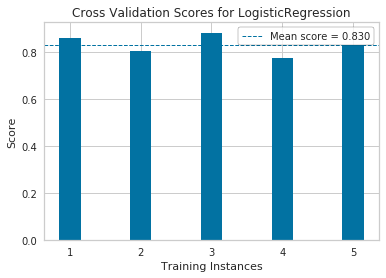

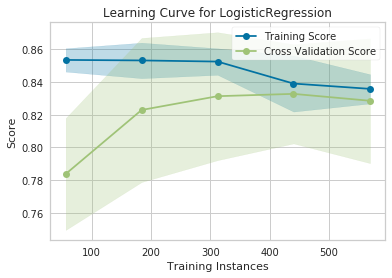

array([0.86013986, 0.8041958 , 0.88111888, 0.77464789, 0.82978723])

In [41]:
model.logistic_regression(cv=True, learning_curve=True, run=False, max_iter=1000)

In [42]:
model.logistic_regression(max_iter=1000, run=True)

In [43]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


In [54]:
model.log_reg.metrics()

,log_reg
Accuracy,0.804469
Balanced Accuracy,0.785462
Average Precision,-999.000000
ROC AUC,0.785462
Zero One Loss,0.000000
Precision,0.730159
Recall,0.718750
Matthews Correlation Coefficient,0.572952
Log Loss,-999.000000
Jaccard,0.567901


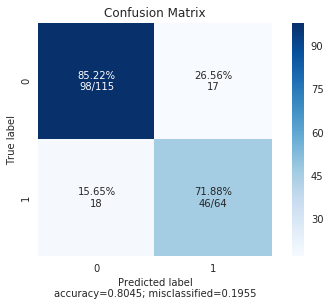

In [44]:
model.log_reg.confusion_matrix(hide_counts=False)

In [45]:
model.log_reg.roc_curve()

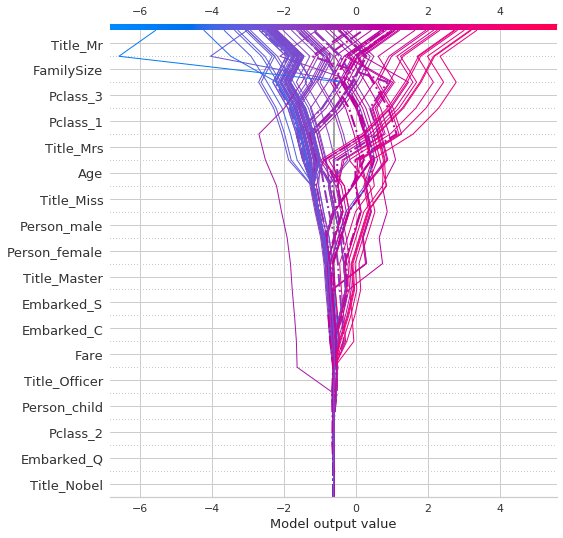

In [46]:
r = model.log_reg.decision_plot(0.5, highlight_misclassified=True)

In [47]:
model.log_reg.force_plot(sample_no=1)

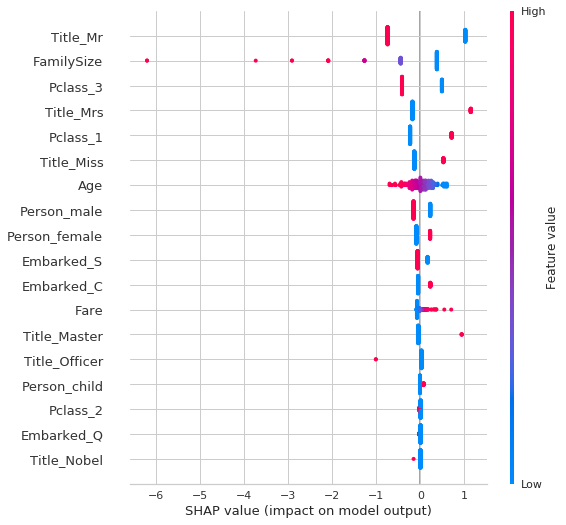

In [48]:
model.log_reg.summary_plot()

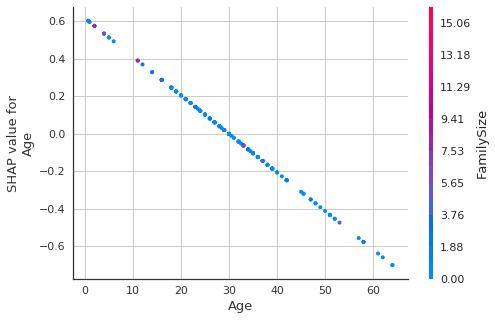

In [49]:
model.log_reg.dependence_plot('Age')

In [50]:
model.log_reg.interpret_model()

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!



<!-- http://127.0.0.1:7737/140434976062344/ -->
 Open in new window